In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
df=pd.read_csv('/content/drive/MyDrive/Employee salaries for differrnt job roles-cognorise/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


**Data Exploration**

In [101]:
df.shape

(607, 12)

In [102]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [103]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [105]:
df.describe().round(2)

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00,607.00
mean,303.00,2021.41,324000.06,112297.87,70.92
std,175.37,0.69,1544357.49,70957.26,40.71
min,0.00,2020.00,4000.00,2859.00,0.00
25%,151.50,2021.00,70000.00,62726.00,50.00
50%,303.00,2022.00,115000.00,101570.00,100.00
75%,454.50,2022.00,165000.00,150000.00,100.00
max,606.00,2022.00,30400000.00,600000.00,100.00


In [106]:
df.dtypes

,0
Unnamed: 0,int64
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64


In [107]:
cols=['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']
for col in cols:
  print(f'{"*"*20} {col} {"*"*20}')
  print(df[col].value_counts())
  print()

******************** experience_level ********************
experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

******************** employment_type ********************
employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

******************** job_title ********************
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager        

**Data Cleaning**

Handling missing values

In [108]:
df.isna().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [109]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [110]:
duplicate=df.loc[df.duplicated(keep=False)]
duplicate

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
119,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
303,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
587,2022,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M
588,2022,SE,FT,Data Analyst,99000,USD,99000,US,0,US,M
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M


In [111]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
560,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
561,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
562,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
563,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Dealing with outliers

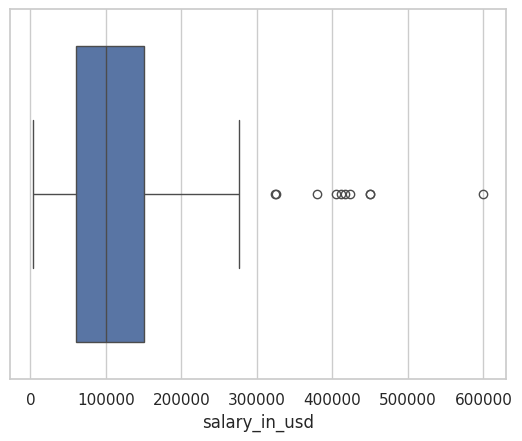

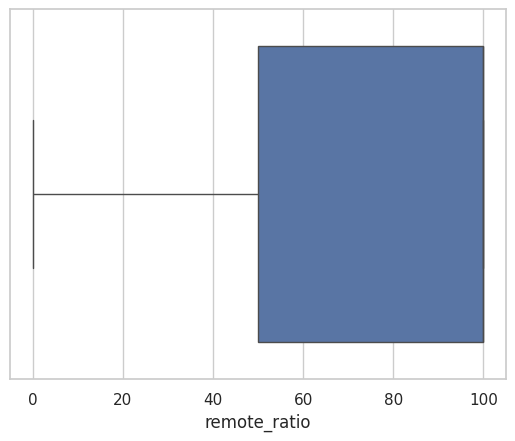

In [112]:
cols=['salary_in_usd','remote_ratio']
for col in cols:
  sns.boxplot(x=df[col])
  plt.show()

The boxplot of the attribute 'salary_in_usd' shows that most of the salary data falls between 50,000 to 1,50,000 USD, with a median of 1,00,000 USD.There are some salaries above 2,50,000 USD and upto 6,00,000 USD which are outliers.
The boxplot of the attribute 'remote_ratio' does not show any outliers and it shows that most jobs in this dataset seem to be fully remote (100% remote), while a smaller portion of jobs has limited or no remote work.


In [113]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['salary_in_usd'] >= lower_bound) &
                                  (df['salary_in_usd'] <= upper_bound)]

In [114]:
df=df.reset_index(drop=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
550,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
551,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
552,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
553,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [115]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Research Scientist', 'Machine Learning Manager',
       'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Marketing Data Analyst', 'Cloud Data Engineer',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       'Applied Machine Learning 

Standardizing the Job titles

In [116]:
df['job_title'] = df['job_title'].replace(['Machine Learning Engineer', 'ML Engineer'], 'ML Engineer')
print(df['job_title'].unique())


['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'ML Engineer' 'Data Analyst' 'Lead Data Scientist'
 'Business Data Analyst' 'Lead Data Engineer' 'Lead Data Analyst'
 'Data Engineer' 'Data Science Consultant' 'BI Data Analyst'
 'Research Scientist' 'Machine Learning Manager'
 'Data Engineering Manager' 'Machine Learning Infrastructure Engineer'
 'AI Scientist' 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Director of Data Science' 'Marketing Data Analyst' 'Cloud Data Engineer'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Analyst' 'Principal Data Analyst'
 'Big Data Architect' 'S

**Data Visualization**

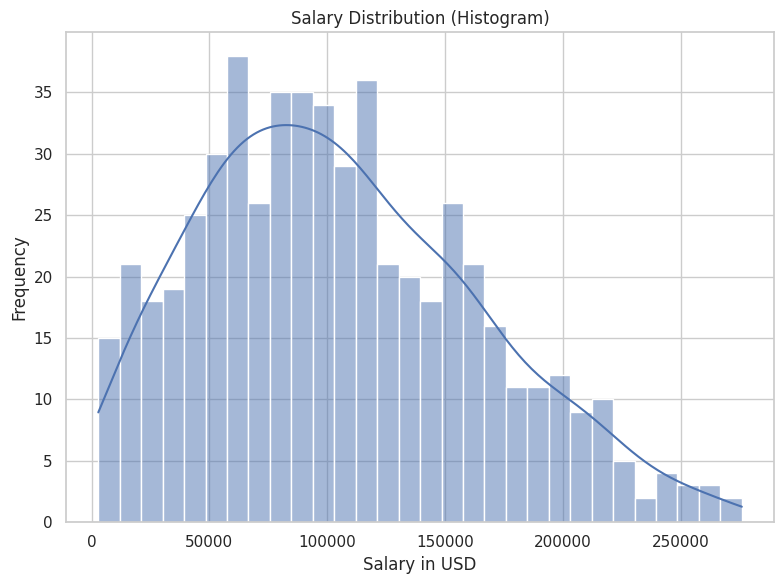

In [117]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, ax=ax)
ax.set_title('Salary Distribution (Histogram)')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

The salary distribution is right-skewed, meaning that the majority of people earn within the lower to mid-range salary packages, while a smaller portion of the population earns higher salaries.The peak or the mode of the distribution occurs around the
60,000−80,000 USD range. This indicates that most employees in the dataset earn salaries within this range.

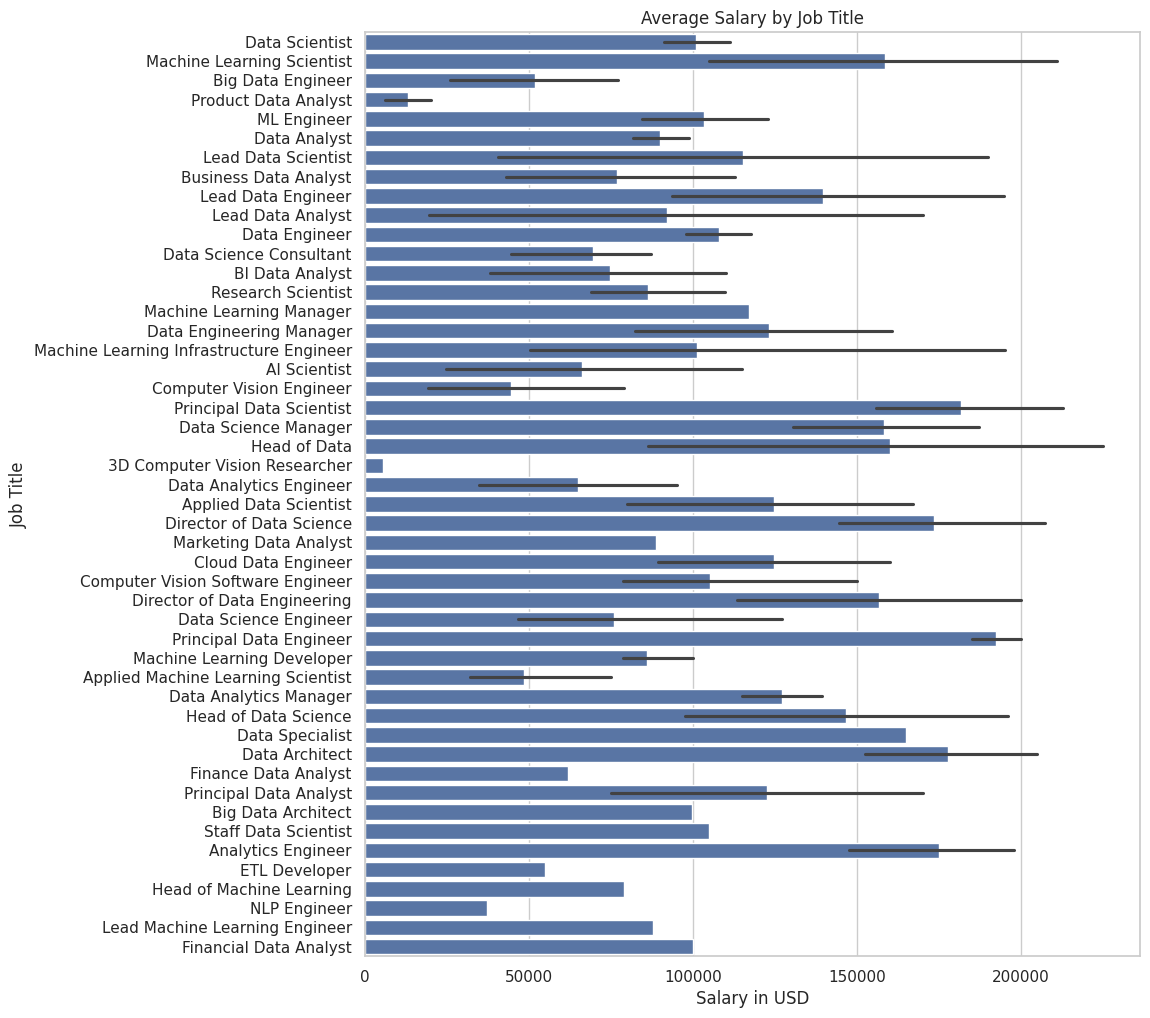

In [118]:
plt.figure(figsize=(10,12))
sns.barplot(x='salary_in_usd', y='job_title', data=df)
plt.title('Average Salary by Job Title')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.show()

Principal Data Engineer has the highest average salary among all other job titles. Principal Data Scientist, Data Architect, Director of Data Science and Analytics Engineer are the other job roles that have highest salary.

Text(0, 0.5, 'Experience Level')

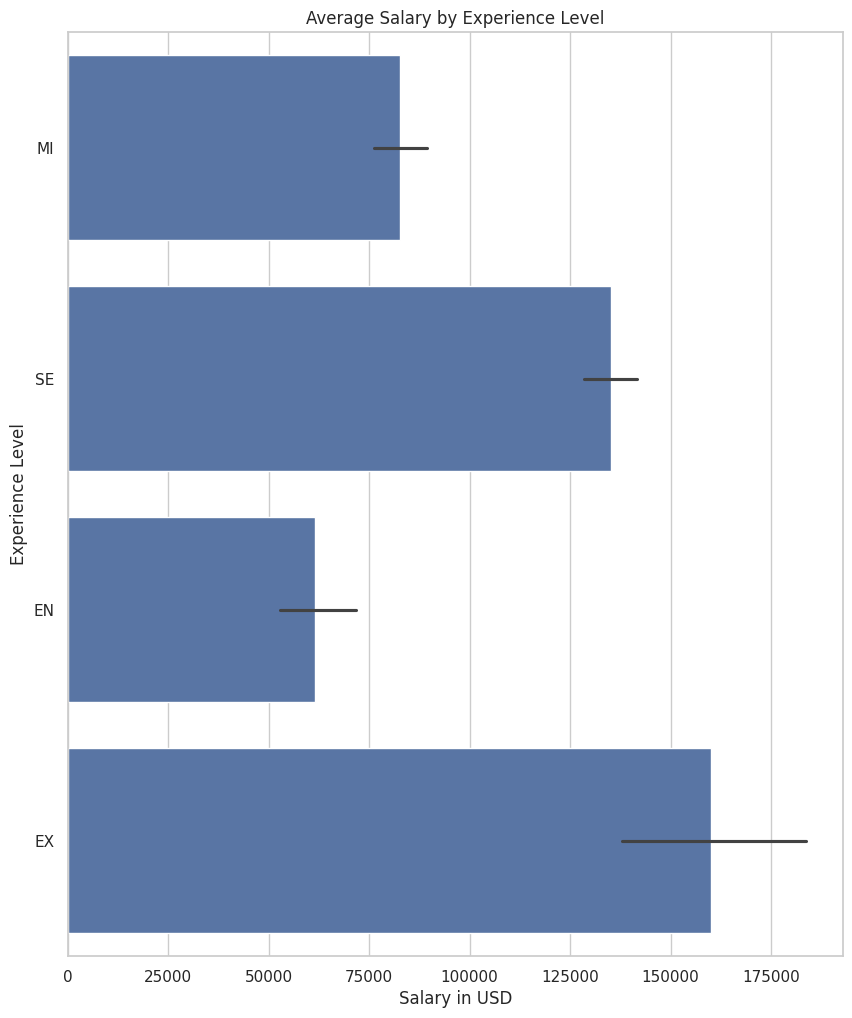

In [119]:
plt.figure(figsize=(10,12))
sns.barplot(x='salary_in_usd', y='experience_level', data=df)
plt.title('Average Salary by Experience Level')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')

Executive Level (EX) professionals earn the highest average salary, significantly more than all other experience levels. Senior Level (SE) professionals come next in terms of average salary and Entry Level (EN) professionals earn the lowest average salary.

Text(0, 0.5, 'Employment Type')

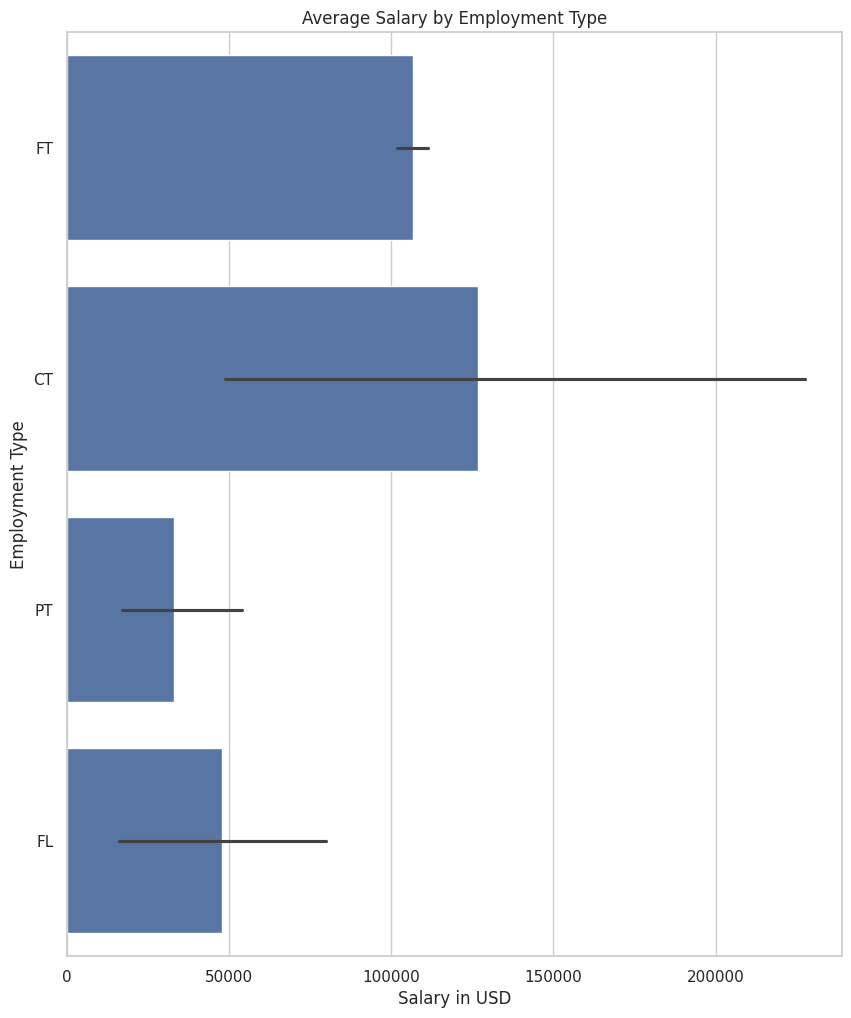

In [120]:
plt.figure(figsize=(10,12))
sns.barplot(x='salary_in_usd', y='employment_type', data=df)
plt.title('Average Salary by Employment Type')
plt.xlabel('Salary in USD')
plt.ylabel('Employment Type')

Contract (CT) employees have the highest salary compared to all other employment types. Full-time (FT) employees comes next and Part-time (PT) employees gets the least.

Text(0, 0.5, 'Company Size')

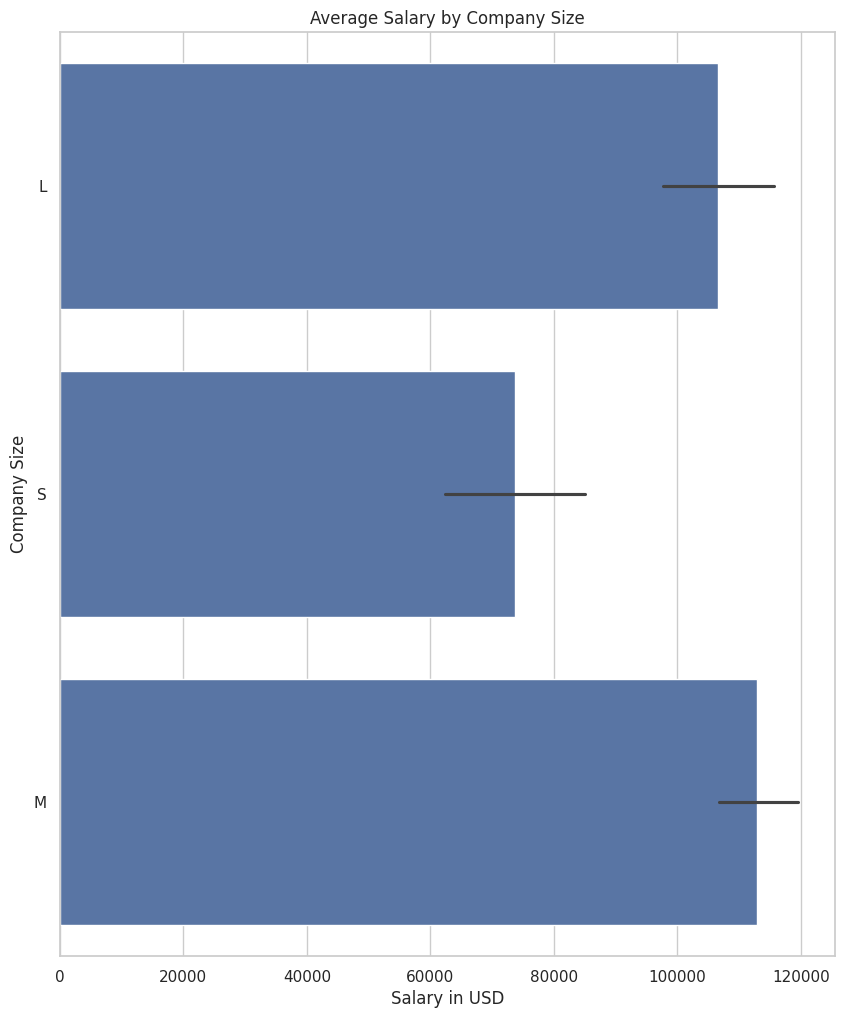

In [121]:
plt.figure(figsize=(10,12))
sns.barplot(x='salary_in_usd', y='company_size', data=df)
plt.title('Average Salary by Company Size')
plt.xlabel('Salary in USD')
plt.ylabel('Company Size')

The Medium (M) sized companies provides the highest average salary for their employees. Large (L) sized companies comes only the second.

Text(0, 0.5, 'Remote Ratio')

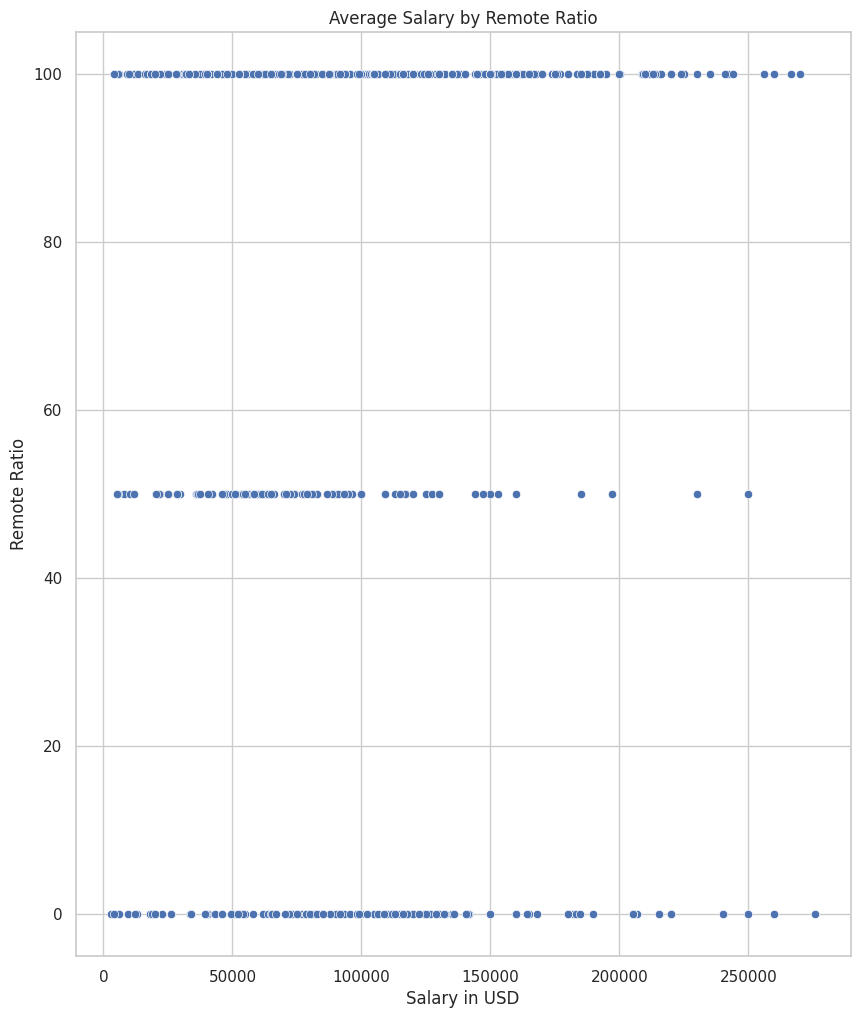

In [122]:
plt.figure(figsize=(10,12))
sns.scatterplot(x='salary_in_usd', y='remote_ratio', data=df)
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Salary in USD')
plt.ylabel('Remote Ratio')

Most employees either work fully remotely (100% remote ratio) or not at all (0% remote ratio). The salaries for employees with a remote ratio of 100 (fully remote) are concentrated in the higher salary range. This indicates that fully remote employees tend to earn higher salaries compared to those with a lower remote ratio.

Text(0, 0.5, 'Experience Level')

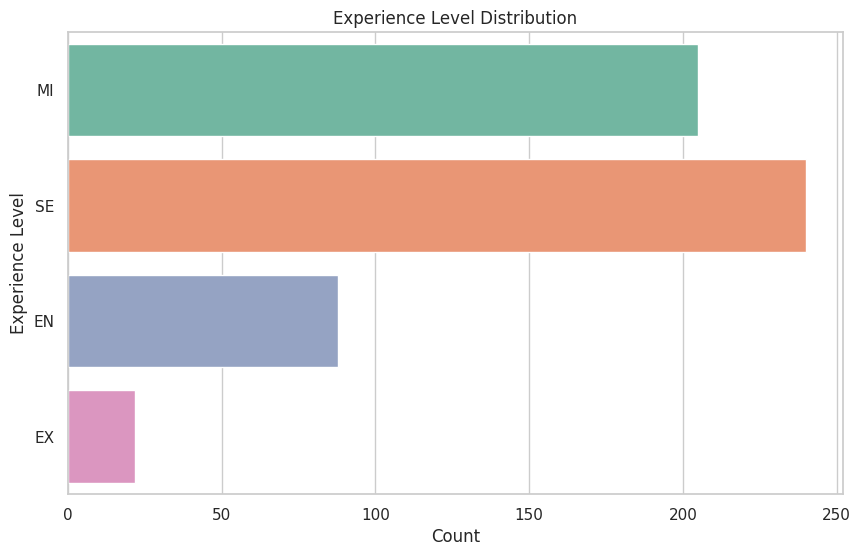

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(df['experience_level'],palette='Set2')
plt.title('Experience Level Distribution')
plt.xlabel('Count')
plt.ylabel('Experience Level')

The countplot shows that higher number of employees belong to the Senior (SE) level. Mid (MD) level comes the next and Executive (EX) level employees are the least in number.

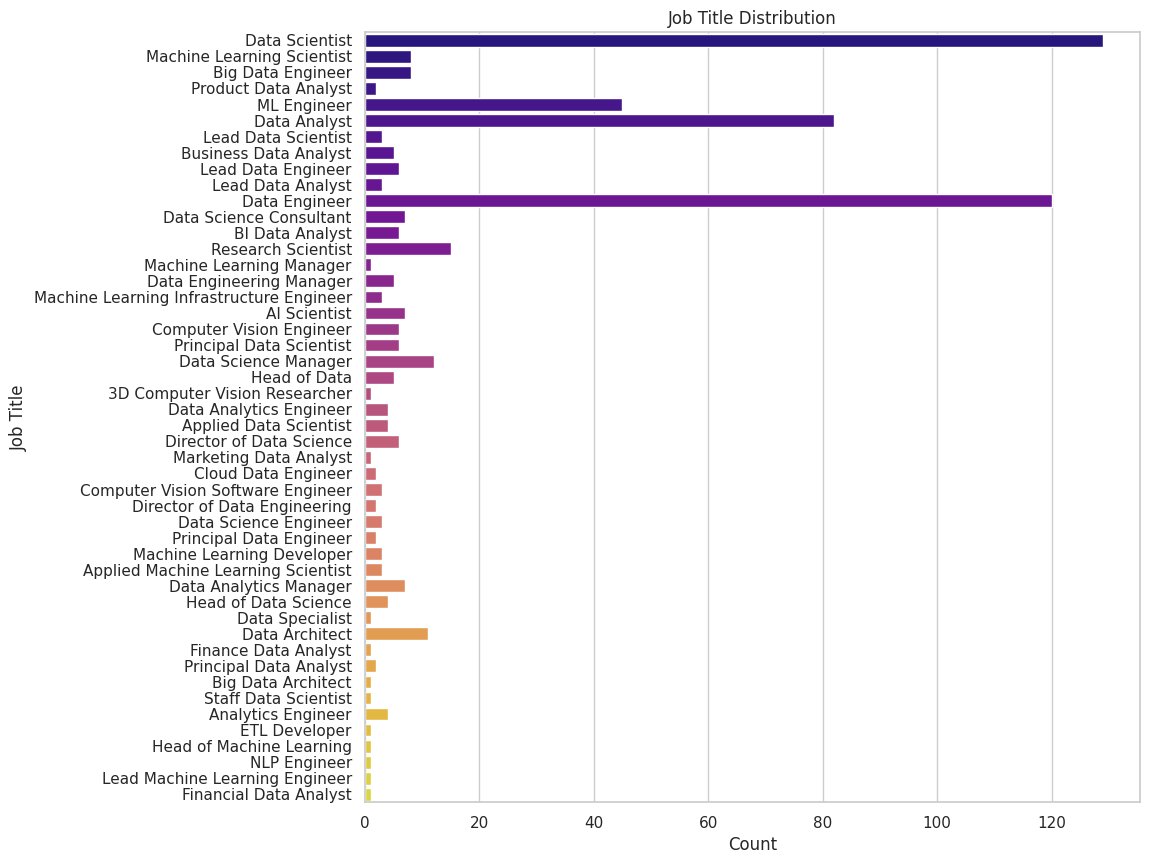

In [124]:
plt.figure(figsize=(10,10))
sns.countplot(df['job_title'],palette='plasma')
plt.title('Job Title Distribution')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


Data Scientist is the most popular job title, followed by Data Engineer, Data Analyst and ML Engineer.

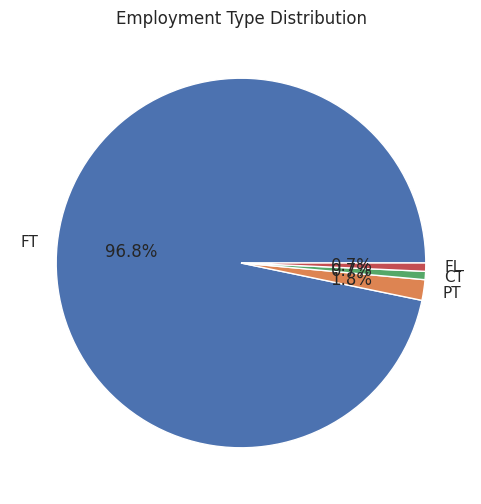

In [125]:
plt.figure(figsize=(6,6))
plt.pie(df['employment_type'].value_counts(), labels=df['employment_type'].value_counts().index, autopct='%1.1f%%')
plt.title('Employment Type Distribution')
plt.show()

Full-time (FT) employment is the dominant form of work. 96.8% of the individuals represented in the data are employed full-time.
Part-time (PT), contract (CT), and freelance (FL) work are less common. These employment types account for a relatively small percentage of the total.

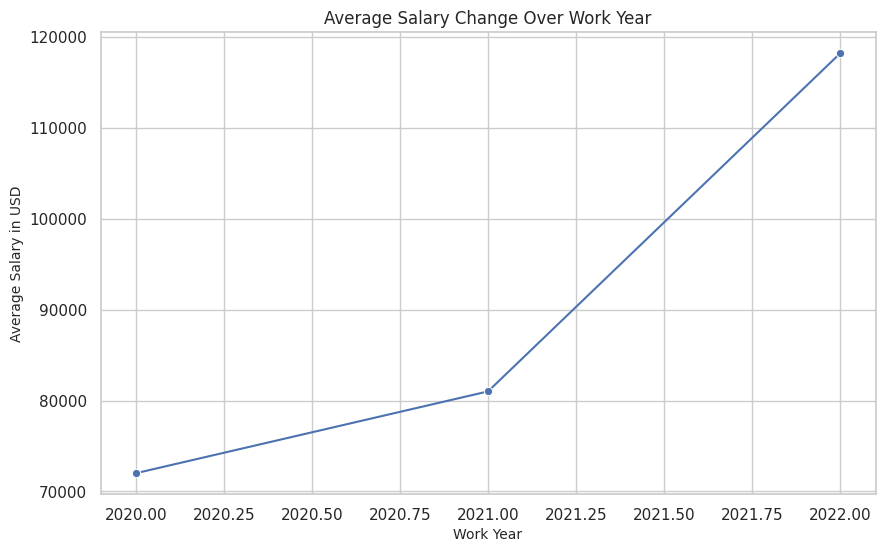

In [126]:
df_grouped = df.groupby('work_year')['salary_in_usd'].median().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='work_year', y='salary_in_usd', marker='o')
plt.title('Average Salary Change Over Work Year', fontsize=12)
plt.xlabel('Work Year', fontsize=10)
plt.ylabel('Average Salary in USD', fontsize=10)
plt.show()


The average salary has shown a significant increase over the work year.
The rate of increase seems to have accelerated towards the end of the year, suggesting a more pronounced rise in salaries during the later part of the year.

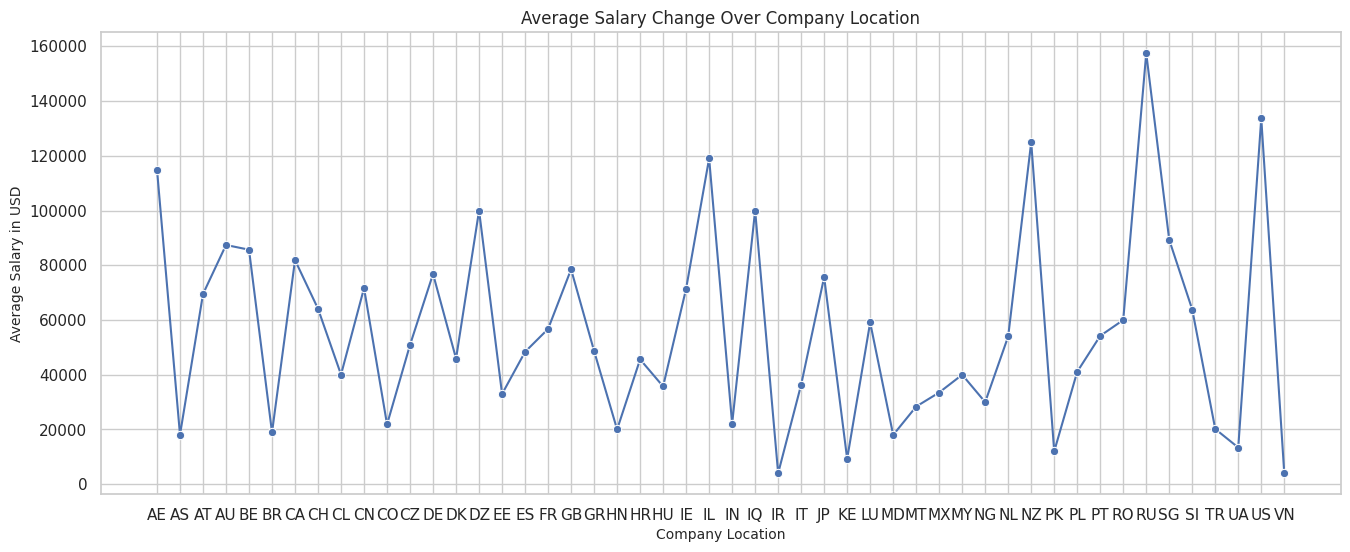

In [127]:
df_grouped = df.groupby('company_location')['salary_in_usd'].median().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_grouped, x='company_location', y='salary_in_usd', marker='o')
plt.title('Average Salary Change Over Company Location', fontsize=12)
plt.xlabel('Company Location', fontsize=10)
plt.ylabel('Average Salary in USD', fontsize=10)
plt.show()

There is significant variability in average salaries across different locations. Countries like the RU (Russia), US, NZ (New Zealand) and IL (Israel) show some of the highest average salaries.  Some locations like IR (Iran), VN (Vietnam), KE (Kenya) and PK (Pakistan) show relatively lower average salaries.